# Numerical Data

Numerical data is data that consists of number values that include integers and rational numbers. Temperature collections, height recordings, and numerical grades in a class are examples of numerical data. In this section, we will practice making histograms, scatter plots, and line graphs to represent numerical data. Again, load the necessary libraries and data:

## Histograms

Histograms are a great way to view distributions of numerical data. In histogram plots, a numerical component of data is divided into what are called *bins*. As data points are assigned to their respective bins, the total number of data points in each bin is quantified and plotted, visualizing a distribution of frequencies. In the upcoming exercise, we will explore how to visualize a distribution of values in our dataset.


Let's examine military spending in the United States from 1960 to 2020. We can look at multiple ranges of dollar amounts spent on the military as our independent variable and organize them into bins. After, we can determine how many fiscal years fall into each of these bins and visualize the distribution. First, we will need to extract the data pertaining to the military spending in the United States. We will call it `hist_data`. Then, we will need to determine the minimum and maximum values of this subset of data so that we can determine the range of values:

In [2]:
hist_data = military["USA-USD"]
print(hist_data.min())
print(hist_data.max())

47.34655267
778.2322


We see that the minimum amount the United States spent on the military between the years of 1960 and 2020 was about \$47 billion, while the maximum amount was about \$780 billion. With this information, we will create an element called `binnum` that ranges from 0 to 801 so that it is inclusive of all the data values. We make the interval of the range 100, giving us eight evenly spaced bins.

In [3]:
binnum=range(0,801,100)
list(binnum)

[0, 100, 200, 300, 400, 500, 600, 700, 800]

To graph the distribution of military spending, we will make a histogram by calling the `plt.hist()` funtion. Minimally, this function needs an input set of values, but additionally, we will specify the bins so that they are evenly distributed on the x-axis. We do this by inputting `binnum` as our `bins` argument. If we do not specify the `bin` argument, the data will be divided into 10 bins.

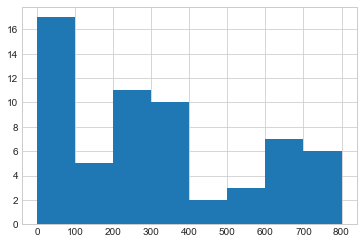

In [6]:
plt.hist(hist_data, bins = binnum)
plt.show()

Now that we have our plot, let's add additional details to make it more understandable:

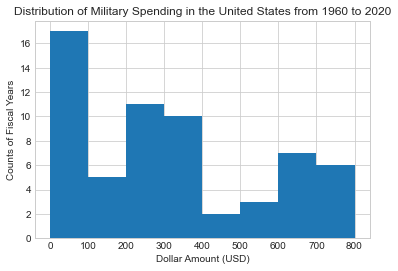

In [5]:
plt.hist(hist_data, bins = binnum)
plt.title("Distribution of Military Spending in the United States from 1960 to 2020")
plt.ylabel('Counts of Fiscal Years')
plt.xlabel("Dollar Amount (USD)")
plt.show()

Awesome! From this plot, we can see that the United States had the highest frequency of fiscal years where 0 - \\$100 billion was spent on the military. We can also see that the \\$400 - \\$500 billion bin had the lowest frequency with only two years spending that range of money.

## Scatter plots

Next, we'll examine the use of a scatter plot as another visualization tool for numerical data. Scatter plots visualize the relationship between two numerical variables. For this exercise, let's examine the percentage of the GDP of Mexico spent on the military versus the absolute dollar amount (in USD) from 1960 - 2020. We can simply extract the columns for this data and assign them to `mex_gdp` and `mex_usd`, respectively. Then, we can plot this data using the `plt.scatter()` function.

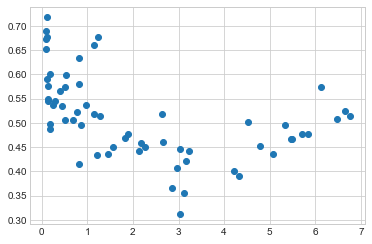

In [6]:
mex_gdp = military.iloc[:,5]
mex_usd = military.iloc[:,2]


plt.scatter(mex_gdp, mex_usd) #mex_gdp on the x-axis, mex_usd on the y axis
plt.show()

We can see from the data points that there appears to be an overall <i>negative association</i> between the percentage of the GDP and the dollars spent. In order words, we generally see that when the military spending takes up a higher percentage of Mexico's GDP, less money (in USD) is allocated toward the military. This may be due to fluctuations in Mexico's GDP from year to year while the country still aiming to maintain a similar budget on the military. This relationship can be described through performing a linear regression. We can plot this regression analysis, along with the associated equation, to visualize this relationship. For a more in depth explanation of of linear regression analysis, see **chapter X**.

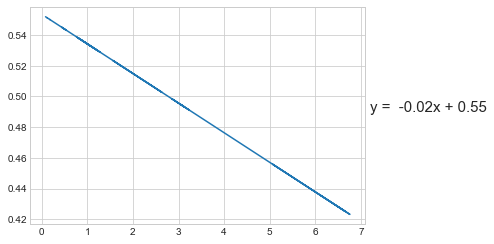

In [7]:
#did I do this correctly?
m, b = np.polyfit(mex_gdp, mex_usd, 1)
plt.plot(mex_gdp, m*mex_gdp+b)
plt.text(7.2,0.49, 'y = ' + ' {:.2f}'.format(m) + 'x + ' + '{:.2f}'.format(b), size=15)
plt.show()

Results of the regression analysis confirm that there is a negative association between the percentage of the GDP and the dollars spent because the slope is negative. Let's combine the plots of the data points and the regression analysis into one graph. We can also add descriptive details to the plot.

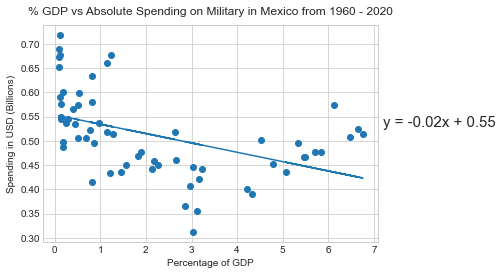

In [8]:
fig, ax = plt.subplots()
plt.scatter(mex_gdp, mex_usd)
plt.plot(mex_gdp, m*mex_gdp+b)
plt.text(7.2,0.53, 'y = ' + '{:.2f}'.format(m) + 'x + ' + '{:.2f}'.format(b), size=15)
plt.title("% GDP vs Absolute Spending on Military in Mexico from 1960 - 2020", pad = 10)
ax.set_ylabel('Spending in USD (Billions)')
ax.set_xlabel('Percentage of GDP')
plt.show()

Together, these plots easily show the relationship between the percentage of the GDP spent on the military and the total money spent (in USD) in Mexico between 1960 and 2020. By overlaying the regression line onto the data points, one can clearly see that there is a negative association with the data.

## Line graphs

Line graphs are used to visualize sequential numerical data. By using line graphs, we can easily see trends within data over time. Let's examine the spending (in USD) on the military in Canada in the 21st century (from  2000 - 2020). First, we extract the years of interest and assign it to the variable `years`. Then, we extract the spending in Canada from the years of interest and assign it to `can_usd`. Lastly, we plot this by calling `plt.plot()` and specifiy the years on the x-axis and the spending on the y-axis.

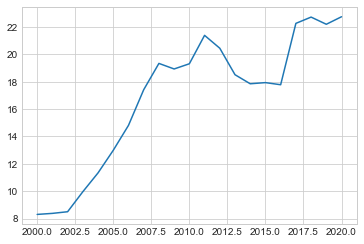

In [7]:
years = military.iloc[40:61 ,0]
can_usd = military.iloc[40:61,4]

can_plot = plt.plot(years, can_usd)

We can see from the graph that Canada's spending on the military has increased overall since 2000. The country had a period of time (around 2011 to 2017) where military spending was decreasing every year consistently. Let's add the data for Mexico as well to see the country's spending in the 21st century.

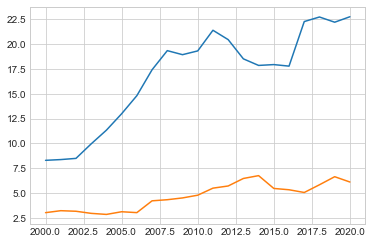

In [8]:
mex_usd = military.iloc[40:61,5]

can_plot = plt.plot(years, can_usd)
mex_plot = plt.plot(years, mex_usd)

We can now see that the military spending for both Mexico and Canada is vastly different. However, just looking at this graph out of context, we wouldn't be able to tell which line corresponds to which country. Let's add some descriptive details, such as line labels, a title, and axis labels. Let's also fix the x-axis ticks to set an interval for every five years.

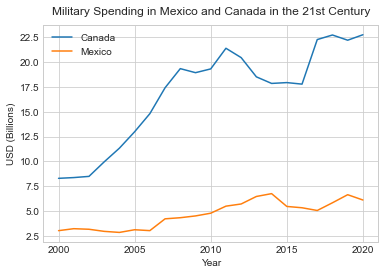

In [9]:
can_plot = plt.plot(years, can_usd, label = 'Canada')
mex_plot = plt.plot(years, mex_usd, label = 'Mexico')

plt.title("Military Spending in Mexico and Canada in the 21st Century", pad = 10)
plt.ylabel('USD (Billions)')
plt.xlabel('Year')
plt.xticks(list(np.arange(2000, 2025, 5)))

plt.legend(loc = "best")


plt.show()

We can see that the overall trend of military spending in Mexico also increased from 2000 to 2020. However, this increase was a lot less drastic than observed in Canada. Mexico's military spending was a steady rise from about \\$3 billion to \\$6 billion over the course of 20 years, while Canada's spending rose from \\$8 billion to about \\$23 billion over the same period of time. Let's add data from the United States to see the trends in all North American countries.

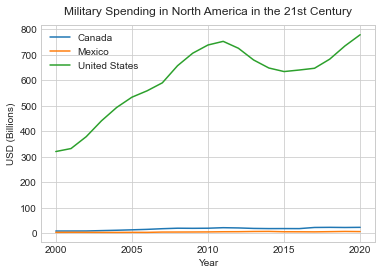

In [11]:
usa_usd = military.iloc[40:61,6]

can_plot = plt.plot(years, can_usd, label = 'Canada')
mex_plot = plt.plot(years, mex_usd, label = 'Mexico')
usa_plot = plt.plot(years, usa_usd, label = 'United States')

plt.title("Military Spending in North America in the 21st Century", pad = 10)
plt.ylabel('USD (Billions)')
plt.xlabel('Year')
plt.xticks(list(np.arange(2000, 2025, 5)))

plt.legend(loc = "best") #use the best positioning of the legend



plt.show()

With the addition of the data from the United States, it's diffiult to discern the data from Canada and Mexico. Because the spending on the military in the United States was a lot higher, plotting all three datasets on the same graph with the same axis does not allow us to clearly see trends in the other countries. To address this, we can graph the data for each country separately with axis limits that are tailored to each country. If we graph this data side by side, we can see the trends in each country while acknowledging that the axis intervals for each country provides a numerical context for cross-comparisons.

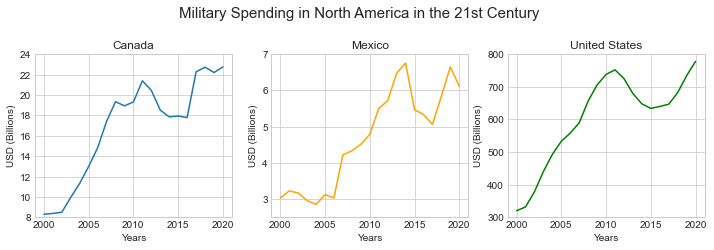

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))


fig.suptitle('Military Spending in North America in the 21st Century', y=1.1, fontsize = 15)


ax1.plot(years, can_usd)
ax1.set_title('Canada')
ax1.set_ylim([8, 24])
ax1.set_xlabel('Years')
ax1.set_ylabel('USD (Billions)')

ax2.plot(years, mex_usd, color='orange')
ax2.set_title('Mexico')
ax2.set_ylim([2.5, 7])
ax2.set_xlabel('Years')
ax2.set_ylabel('USD (Billions)')

ax3.plot(years, usa_usd, color = 'green')
ax3.set_title('United States')
ax3.set_ylim([300, 800])
ax3.set_xlabel('Years')
ax3.set_ylabel('USD (Billions)')


plt.show()

Now that we've created separate plots, we can see the trends for all three countries over the last 20 years. All three countries seem to have decreased spending around 2011 and 2018. By observing the difference in scale, we can also see that while the trends are similar, the magnitude of spending was very different between Canada, Mexico, and the United States.

In creating these plots, we used `plt.subplots()` in a way that we had not used it before. Here, we defined our `fig` argument, as well as three `axes` arguments, `ax1`, `ax2`, and `ax3`. This allowed us to create <u>three</u> separate plotting areas, bounded by <u>three</u> different axes, that are contained within <u>one</u> figure.

## Conclusions:

In this section, we learned how to use `plt.hist()`, `plt.scatter()`, and `plt.plot()` to create histograms, scatter plots, and line graphs as a means of visualizing numerical data. The `plt.scatter()` and `plt.plot()` functions requires numerical arrays that serve as `x` and `y` arugments. The `plt.hist()` function requires an array of values for plotting distributions of data. We also learned about a number of other functions that can be used to enhance and annotate our plots. Documentation for the functions used in this section are listed below:

- <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html">plt.hist()</a>
- <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html">plt.scatter()</a>
- <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html">plt.plot()</a>
- <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html">ax.suptitle()</a>
- <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html">ax.set_title()</a>
- <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html">ax.set_ylim()</a>
- <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html">ax.set_xlim()</a>
- <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html">ax.set_ylabel()</a>
- <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html">ax.set_xlabel()</a>
- <a href="https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html">np.polyfit()</a>